In [1]:
file = 'synthetic.txt'
import csv
with open(file,'r') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

In [2]:
data = {'Node_label': [], 'X1':[], 'Y1': [], 'X2': [], 'Y2': [], 'Edge': [], 'Edge_labels': []}
edge_data = {'Edge_label': [],  'Node_labels': []}


In [3]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [4]:
x, y = [], []
for j, n in enumerate(d):
    try:
        if n == ['BEGIN_NODES']:
            for k, num in enumerate(d[j +1:-1]):
                data['Node_label'].append(num[0])
                data['X1'].append(num[1])
                data['Y1'].append(num[2])
                data['X2'].append(num[3])
                data['Y2'].append(num[4])
                data['Edge'].append(num[5])
                labels = [n for n in num[6:-1] if n != '-1' and is_number(n) and len(n) < 10 and n != '0']
                data['Edge_labels'].append(labels)
    except:
        pass


In [5]:
import pandas as pd
nodes_dataframe = pd.DataFrame(data)
nodes_dataframe.set_index('Node_label', inplace = True)

In [6]:
for j, n in enumerate(d):
    try:
        if n == ['BEGIN_ALLEDGES']:
            for k, num in enumerate(d[j +1:-1]):
                edge_data['Edge_label'].append(num[0])
                labels = [n for n in num[2:6] if n != '10000001' and is_number(n) and len(n) < 6 and n != '0']
                edge_data['Node_labels'].append(labels[0:2])
    except:
        pass


In [7]:
import pandas as pd
edges_dataframe = pd.DataFrame(edge_data)
edges_dataframe.set_index('Edge_label', inplace=True)

In [8]:
edges_dataframe

,Node_labels
Edge_label,
14,"[14, 1434]"
15,"[15, 366]"
19,"[18, 1435]"
21,"[17, 374]"
36,"[30, 1413]"
41,"[34, 1442]"
42,"[35, 403]"
43,"[13, 405]"
45,"[409, 36]"


In [9]:
def is_not_equal(e, list_of_labels):
    count = 0
    for ll in list_of_labels:
        if ll == e:
            count = 1
    if count == 0:
        return True
    else:
        return False
    

In [10]:
def get_edge_co_ordinates(node_label, x, y, X, Y, nodes_dataframe, edges_dataframe, list_of_labels, index, counter):
    list_of_labels.append(node_label)
    x.append(float(nodes_dataframe.X1[str(node_label)]))
    y.append(float(nodes_dataframe.Y1[str(node_label)]))     
    print(counter)
    if len(nodes_dataframe.Edge_labels[str(node_label)]) == 3 and counter != 0:
#         print('why', nodes_dataframe.Edge_labels[str(node_label)] )
        X.append(x)
        Y.append(y)
        return x, y, X, Y, node_label
    else:
        edge_labels = nodes_dataframe.Edge_labels[str(node_label)] 
        next_node_label = [e for e in edges_dataframe.Node_labels[edge_labels[index]] if is_not_equal(e, list_of_labels)]
        if next_node_label == []:
            if index == 0:
                next_node_label = [e for e in edges_dataframe.Node_labels[edge_labels[1]] if is_not_equal(e, list_of_labels)]
            else:
                next_node_label = [e for e in edges_dataframe.Node_labels[edge_labels[0]] if is_not_equal(e, list_of_labels)]
#         print(node_label, next_node_label, len(edge_labels))
        try:
            counter = counter + 1
            x, y, X, Y, node_label = get_edge_co_ordinates(next_node_label[0],x, y, X, Y, nodes_dataframe, edges_dataframe, list_of_labels, index, counter)
        except:
            pass


    return x, y, X, Y, node_label
    

In [11]:
triple_nodes = {'label':[], 'x': [], 'y': []}
for node_label, row in nodes_dataframe.iterrows():
    if len(nodes_dataframe.Edge_labels[str(node_label)]) == 3:
        triple_nodes['label'].append(str(node_label))
        triple_nodes['x'].append(float(nodes_dataframe.X1[str(node_label)]))
        triple_nodes['y'].append(float(nodes_dataframe.Y1[str(node_label)]))
    

In [12]:
X, Y = [], [] 
x, y = [], []
edges_dict = {'x': [], 'y': []}

for node_label, row in nodes_dataframe.iterrows():
    if node_label in triple_nodes['label']:  
        x, y, X, Y, new_node_label = get_edge_co_ordinates(str(node_label), x, y, X, Y, nodes_dataframe, edges_dataframe, [],0, 0)
#         old_edge_labels = nodes_dataframe.Edge_labels[str(node_label)] 
#         new_edge_labels = nodes_dataframe.Edge_labels[str(new_node_label)] 
#         print(old_edge_labels, new_edge_labels)
#         common_label = [e for e in old_edge_labels if e in new_edge_labels]
#         print(common_label)
#         edges_dict['edge_label'].append(node_label)
        if x not in edges_dict['x']:
            edges_dict['x'].append(x)
            edges_dict['y'].append(y)
        x, y = [], []

        x, y, X, Y, node_label = get_edge_co_ordinates(str(node_label), x, y, X, Y, nodes_dataframe, edges_dataframe, [],1, 0)
#         old_edge_labels = nodes_dataframe.Edge_labels[str(node_label)] 
#         new_edge_labels = nodes_dataframe.Edge_labels[str(new_node_label)] 
#         common_label = [e for e in old_edge_labels if e in new_edge_labels]
#         edges_dict['edge_label'].append(common_label)
        if x not in edges_dict['x']:
            edges_dict['x'].append(x)
            edges_dict['y'].append(y)
        x, y = [], []

    
    
            

0
1
2
3
4
5
6
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
0
1
2
3
4
5
6
0
1
2
3
0
1
2
3
4
5
6
7
8
0
1
2
3
0
1
2
3
4
5
6
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
4
0
1
2
3
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
0
1
2
3
4
0
1
2
3
4
0
1
2
0
1
2
3
4
5
6
0
1
2
3
4
0
1
2
3
4
0
1
2
3
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
0
1
2
3
4
0
1
2
3
4
5
0
1
2
0
1
2
3
4
5
0
1
2
3
4
0
1
2
0
1
0
1
2
3
4
0
1
2
3
0
1
2
3
4
5
6
7
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
0
1
2
0
1
2
3
4
0
1
2
0
1
2
3
0
1
2
3
4
5
6
7
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
5
6
7
8
0
1
2
3
4
0
1
2
3
0
1
2
3
4
5
6
7
8
0
1
2
0
1
2
3
4
0
1
2
3
0
1
2
3
0
1
2
3

In [13]:
# x, y, X, Y = [], [], [], []
# x, y, X, Y = get_edge_co_ordinates('13', x, y, X, Y, nodes_dataframe, edges_dataframe, [])

In [13]:
len(X)

316

In [41]:
new_x = []
for a in X:
    if a not in new_x:
        counter = 0
        for loo in new_x:
            if len(loo) == len(a):

                if len(set(loo).intersection(set(a))) == len(a):
                    counter = 1
        print(counter)
        if counter == 0:
            new_x.append(a)

0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1


In [45]:
new_y = []
for a in Y:
    if a not in new_y:
        counter = 0
        for loo in new_y:
            if len(loo) == len(a):

                if len(set(loo).intersection(set(a))) == len(a):
                    counter = 1
        print(counter)
        if counter == 0:
            new_y.append(a)

0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1


In [57]:
print([len(x) for x in new_x])

[7, 9, 4, 17, 7, 4, 9, 7, 6, 11, 11, 5, 9, 3, 5, 9, 3, 5, 5, 5, 5, 3, 5, 5, 4, 9, 9, 9, 9, 2, 5, 7, 5, 5, 4, 12, 5, 5, 9, 5, 3, 5, 6, 3, 6, 5, 3, 5, 4, 8, 7, 3, 4, 8, 9, 5, 9, 3, 5, 4, 9, 3, 5, 5, 12, 9, 3, 5, 5, 5, 5, 5, 9, 3, 3, 5, 5, 5, 6, 2, 5, 5, 5, 5, 5, 9, 3, 7, 5, 5, 5, 5, 5, 7, 5, 5, 9, 5, 8, 5, 5, 5, 3, 5, 5, 3, 17, 5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 3, 4, 5, 5, 9, 5, 5, 4, 5, 9, 5, 3, 9, 3, 4, 5, 9, 5, 3, 5, 5, 5, 9, 5, 3, 5, 6, 3, 9, 2, 5, 3, 5, 5, 5, 9, 3, 5, 4, 5, 5, 9, 5, 5, 3, 5, 5, 5, 5, 3, 9, 5, 4, 5, 9, 3, 7, 5, 5, 9, 9, 5, 5, 4, 5, 8, 5, 5, 6, 5, 7, 3, 9, 5, 5, 3, 9, 12, 5, 5, 5, 5, 9, 5, 5, 5, 15, 5, 5, 7, 5, 6, 5, 5, 9, 4, 5, 13, 5, 5, 5, 5, 9, 4, 3, 5, 9, 9, 3, 12, 5, 8, 5, 5, 15, 6, 9, 11]


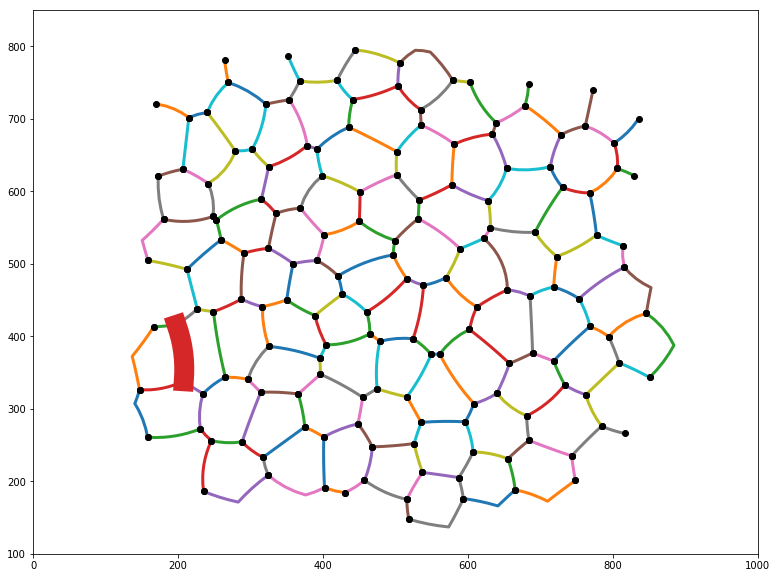

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (14,10))

ax.set(xlim = [0,1000], ylim = [100,850])

cut_x, cut_y = [], []
for i in range(len(new_x)):
    if len(new_x[i]) < 10:
        cut_x.append(new_x[i])
        cut_y.append(new_y[i])
        ax.plot(new_x[i], new_y[i], lw = 3)

        ax.plot(new_x[i][0], new_y[i][0], 'ok')
        ax.plot(new_x[i][-1], new_y[i][-1], 'ok')
#     ax.plot(X[i][0], Y[i][0], '.', markersize =5, color = 'red')
#     ax.plot(X[i][-1], Y[i][-1], '.', markersize =5, color = 'red')

# ax.plot(triple_nodes['x'], triple_nodes['y'], 'ok')
ax.plot(new_x[6], new_y[6], lw = 20)

ax.set_aspect(1)
plt.show()

In [79]:
cut_x[1]

[146.907417552866,
 144.785126275942,
 142.354025037349,
 139.715358979179,
 136.736818051809,
 143.910352202658,
 151.681587897212,
 159.168203883661,
 166.281958825942]

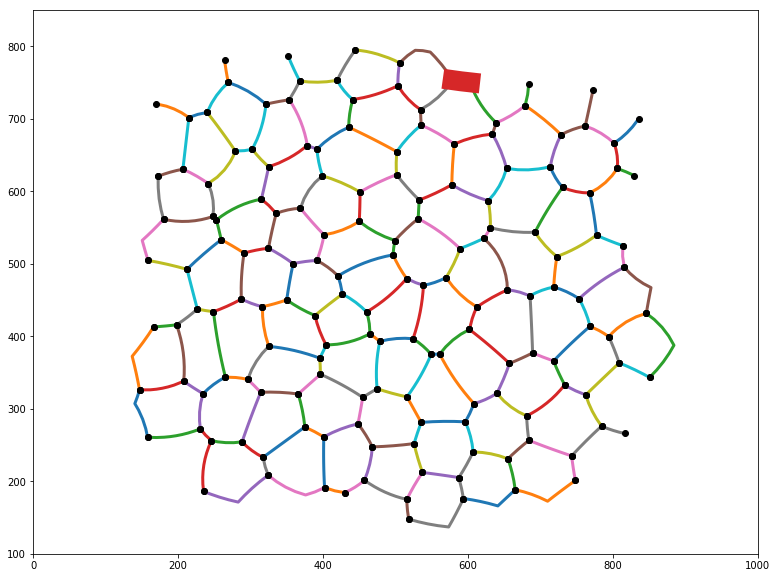

In [169]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (14,10))

ax.set(xlim = [0,1000], ylim = [100,850])

for i in range(len(cut_x)):
    ax.plot(cut_x[i], cut_y[i], lw = 3)

    ax.plot(cut_x[i][0], cut_y[i][0], 'ok')
    ax.plot(cut_x[i][-1], cut_y[i][-1], 'ok')


# ax.plot(triple_nodes['x'], triple_nodes['y'], 'ok')
ax.plot(cut_x[138], cut_y[138], lw = 20)

ax.set_aspect(1)
plt.show()

In [173]:
for j, cut in enumerate(cut_y):
    if max(cut) > 700:
        pass
print(len(cut_x))
        

223


In [176]:
temp_x, temp_y = cut_x, cut_y
indexes = [0,1,6,7,222, 222-6, 222-7, 88, 115, 138]
for index in sorted(indexes, reverse=True):
    print(index)
    del temp_x[index]
    del temp_y[index]

222
216
215
138
115
88
7
6
1
0


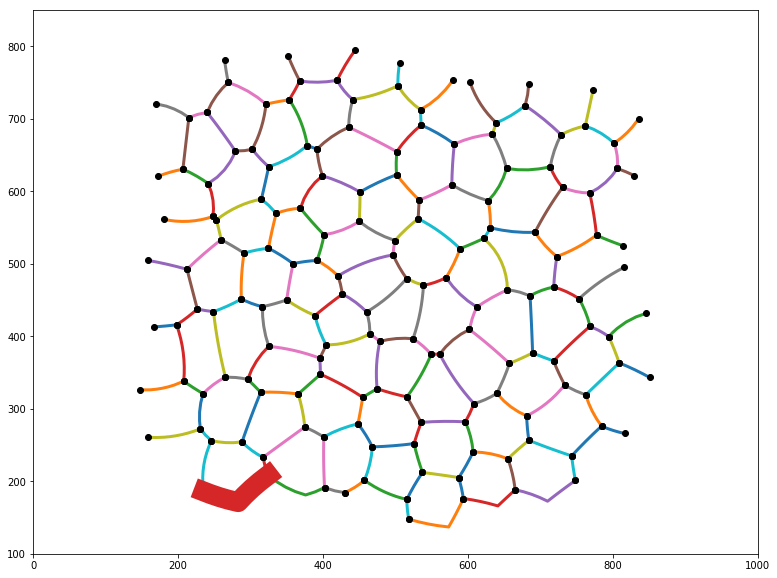

In [214]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (14,10))

ax.set(xlim = [0,1000], ylim = [100,850])

for i in range(len(temp_x)):
    ax.plot(temp_x[i], temp_y[i], lw = 3)

    ax.plot(temp_x[i][0], temp_y[i][0], 'ok')
    ax.plot(temp_x[i][-1], temp_y[i][-1], 'ok')


# ax.plot(triple_nodes['x'], triple_nodes['y'], 'ok')
ax.plot(temp_x[20], cut_y[20], lw = 20)

ax.set_aspect(1)
plt.show()

In [215]:

indexes = [20,42, 77, 121, 163, 164]
for index in sorted(indexes, reverse=True):
    print(index)
    del temp_x[index]
    del temp_y[index]

164
163
121
77
42
20


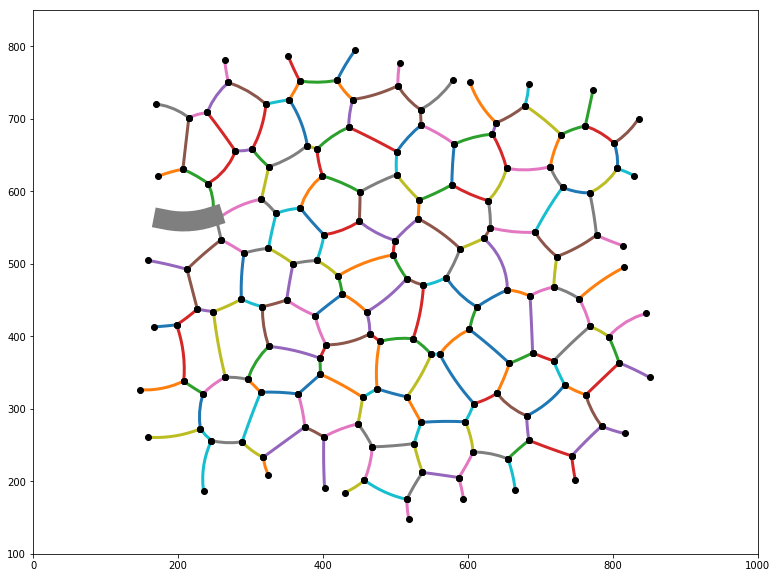

In [216]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (14,10))

ax.set(xlim = [0,1000], ylim = [100,850])

for i in range(len(temp_x)):
    ax.plot(temp_x[i], temp_y[i], lw = 3)

    ax.plot(temp_x[i][0], temp_y[i][0], 'ok')
    ax.plot(temp_x[i][-1], temp_y[i][-1], 'ok')


# ax.plot(triple_nodes['x'], triple_nodes['y'], 'ok')
ax.plot(temp_x[20], cut_y[20], lw = 20)

ax.set_aspect(1)
plt.show()

In [218]:
cellfit_data = {'x': [], 'y': []}
for i in range(len(temp_x)):
    
    cellfit_data['x'].append(temp_x[i])
    cellfit_data['y'].append(temp_y[i])

In [254]:
len(cellfit_data['x'])

207

In [220]:
# # Save file
# import pickle
# # Saving the objects:
# with open('HORRIBLE_CELLFIT_DATA.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump(cellfit_data, f)

In [225]:
# Load file
import pickle
pkl_file = open('HORRIBLE_CELLFIT_DATA.pkl','rb')
cellfit_data = pickle.load(pkl_file)

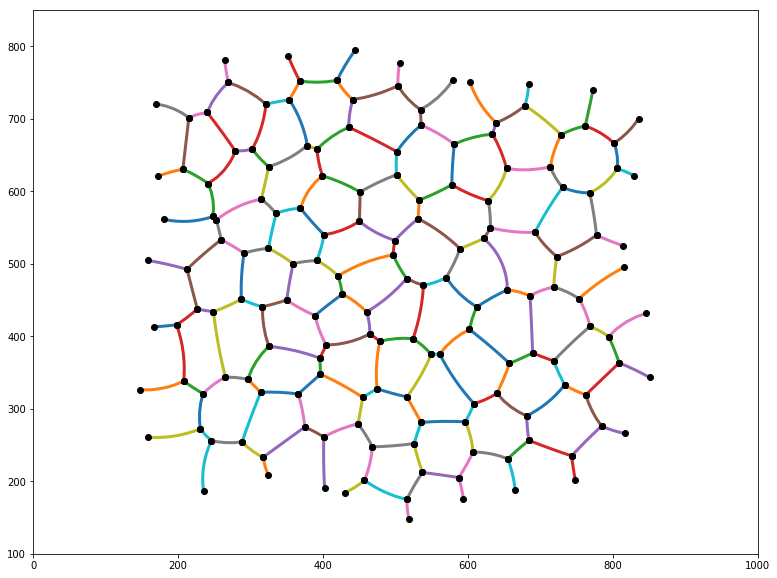

In [226]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (14,10))

ax.set(xlim = [0,1000], ylim = [100,850], aspect = 1)

for i in range(len(temp_x)):
    ax.plot(cellfit_data['x'][i], cellfit_data['y'][i], lw = 3)

    ax.plot(cellfit_data['x'][i][0], cellfit_data['y'][i][0], 'ok')
    ax.plot(cellfit_data['x'][i][-1], cellfit_data['y'][i][-1], 'ok')

plt.show()

In [228]:
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing

ex = manual_tracing(cellfit_data['x'], cellfit_data['y'])
print('Number of edges:',len(new_x))

nodes, edges, new = ex.cleanup(10)

cells = ex.find_cycles(edges)



Number of edges: 235


In [257]:
print(len(edges))

206


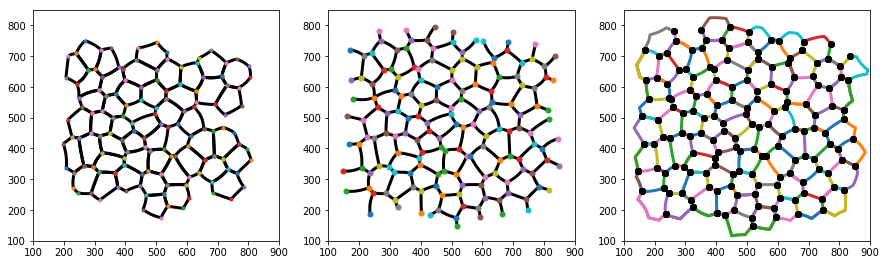

In [229]:
# Plot fitted edges

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,8))
ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)
ax1.set(xlim = [100,900], ylim = [100,850], aspect = 1)
ax2.set(xlim = [100,900], ylim = [100,850], aspect = 1)
[c.plot(ax, lw = 3) for c in cells]

[n.plot(ax1, markersize = 10) for n in nodes]
[n.plot(ax1, markersize = 20) for n in nodes if len(n.edges) == 2]
[e.plot(ax1, lw = 3) for e in edges]

# [n.plot(ax2, markersize = 10) for n in nodes]
# [n.plot(ax2, markersize = 20) for n in nodes if len(n.edges) == 2]
# [e.plot(ax2, lw = 3) for e in edges]

for i in range(len(X)):
    ax2.plot(X[i], Y[i], lw = 3)
    ax2.plot(X[i][0], Y[i][0], 'ok')
    ax2.plot(X[i][-1], Y[i][-1], 'ok')


plt.show()

In [230]:
# Calculate tension and pressure
import numpy.linalg as la
# Get unique cells
cells = ex.find_cycles(edges)

# Get tension and pressure
edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)
tensions, P_T, A = col1.calculate_tension()

pressures, P_P, B = col1.calculate_pressure()

print('Number of edges:',len(col1.tot_edges))
print('Number of nodes:',len(col1.tot_nodes))
print('\n')

Initial Tension guess is [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,

In [252]:
print(len(col1.tot_edges))

206


In [239]:
import numpy as np
np.mean(tensions)

1.0000000000000009

[(100, 850), (100, 900), None]

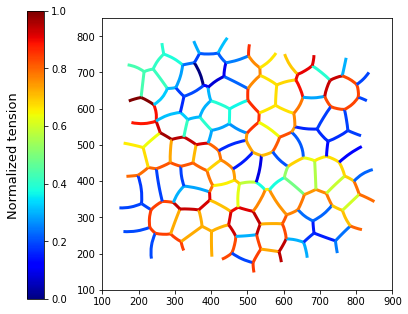

In [235]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_tensions(ax, fig, tensions, lw = 3)
ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)

[(100, 850), (100, 900), None]

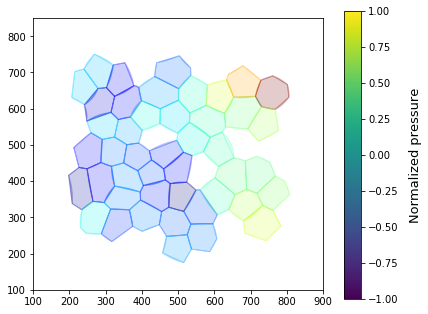

In [238]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_pressures(ax, fig, pressures, lw = 3)
ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)

In [240]:
tension_solution = {'edges': [], 'tension': []}
for e in edges:
    tension_solution['edges'].append(e)
    tension_solution['tension'].append(e.tension)

In [243]:
pressure_solution = {'cells': [], 'pressure': []}
for e in cells:
    pressure_solution['cells'].append(e)
    pressure_solution['pressure'].append(e.pressure)

In [248]:
col1

In [249]:
# # Save file
import pickle
# Saving the objects:
with open('HORRIBLE_CELLFIT_DATA_sol_colony_v1.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(col1, f)

In [250]:
tensions

array([1.23451686, 0.57925471, 0.57986901, 0.5676045 , 1.08131636,
       0.84290597, 0.83254748, 0.84130038, 0.58539827, 1.28681304,
       1.28414163, 1.4524688 , 1.4526825 , 1.2326933 , 1.2393582 ,
       1.09890053, 1.28054546, 1.2773123 , 0.57497901, 0.58514332,
       1.32953473, 1.33771745, 0.82530183, 0.81393957, 0.78616417,
       0.8009614 , 1.28329264, 1.28022945, 1.16050801, 1.38442963,
       1.38956714, 0.69438779, 0.72132784, 0.69959168, 1.06057746,
       1.41927474, 1.37257117, 1.25724866, 1.26172901, 1.16100119,
       1.28062216, 0.57177184, 0.67527063, 0.68266118, 0.57386435,
       0.70909696, 0.72242562, 0.55108704, 0.62094936, 0.37030252,
       0.57535708, 0.59952341, 0.68854633, 1.15896716, 1.15514447,
       1.15313075, 1.40133688, 1.38643853, 0.82013524, 1.37231858,
       1.13460216, 1.35716805, 1.22559626, 1.14173133, 1.25423601,
       1.23910195, 0.58236228, 0.49538816, 0.70186225, 0.80568926,
       0.69326993, 0.79349485, 0.69669765, 1.15371085, 1.07940